In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import requests

dataset_url = "https://www.philippe-fournier-viger.com/spmf/datasets/retail.txt"
data = requests.get(dataset_url).text.splitlines()
transactions = [line.split() for line in data]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

min_support_values = [0.01, 0.02, 0.03]
frequent_patterns = {}

for min_support in min_support_values:
    frequent_patterns[min_support] = apriori(df, min_support=min_support, use_colnames=True)
    print(f"Frequent Patterns for min_support = {min_support}:")
    print(frequent_patterns[min_support])

Frequent Patterns for min_support = 0.01:
     support                      itemsets
0   0.014358                      (%</td>)
1   0.010089                 ((synthetic))
2   0.018626                        (</p>)
3   0.028328              (</strong></td>)
4   0.058983                       (</td>)
..       ...                           ...
75  0.015134                     (is, the)
76  0.025999                     (of, the)
77  0.010089                   (that, the)
78  0.015910                     (to, the)
79  0.010089  (<td>No, </td>, (synthetic))

[80 rows x 2 columns]
Frequent Patterns for min_support = 0.02:
     support          itemsets
0   0.028328  (</strong></td>)
1   0.058983           (</td>)
2   0.065968           (</tr>)
3   0.025999              (<a)
4   0.022895            (<br>)
5   0.061700             (<td)
6   0.022895            (<td>)
7   0.042297          (<td><a)
8   0.021731     (<td>No</td>)
9   0.065968            (<tr>)
10  0.021343            (SPMF)
11  0

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from itertools import combinations

chosen_support = 0.01
frequent_itemsets = apriori(df, min_support=chosen_support, use_colnames=True)

min_confidence_values = [0.5, 0.6, 0.7]
association_rules_by_confidence = {}

for min_conf in min_confidence_values:
    rules = []
    for _, row in frequent_itemsets.iterrows():
        itemset = set(row['itemsets'])
        for item in itemset:
            antecedent = frozenset([item])
            consequent = itemset - antecedent
            if consequent:
                antecedent_support = frequent_itemsets[
                    frequent_itemsets['itemsets'] == antecedent
                ]['support'].values[0]
                rule_confidence = row['support'] / antecedent_support
                if rule_confidence >= min_conf:
                    rules.append({
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': row['support'],
                        'confidence': rule_confidence
                    })
    association_rules_by_confidence[min_conf] = pd.DataFrame(rules)

for min_conf, rules_df in association_rules_by_confidence.items():
    print(f"\nAssociation Rules for min_confidence = {min_conf}:")
    print(rules_df)



Association Rules for min_confidence = 0.5:
                 antecedent            consequent   support  confidence
0             ((synthetic))               {</td>}  0.010089    1.000000
1                  (<td>No)         {(synthetic)}  0.010089    0.962963
2             ((synthetic))              {<td>No}  0.010089    1.000000
3          (</strong></td>)                 {<td}  0.015910    0.561644
4                   (count)      {</strong></td>}  0.010477    0.750000
5                  (<td>No)               {</td>}  0.010477    1.000000
6   (bordercolor="#F0F0F0")                 {<td}  0.018626    1.000000
7                    (SPMF)                  {in}  0.010865    0.509091
8                     (can)                  {be}  0.015910    0.694915
9                      (be)                 {can}  0.015910    0.803922
10                     (by)                 {the}  0.012806    0.687500
11                   (that)                 {the}  0.010089    0.604651
12                 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


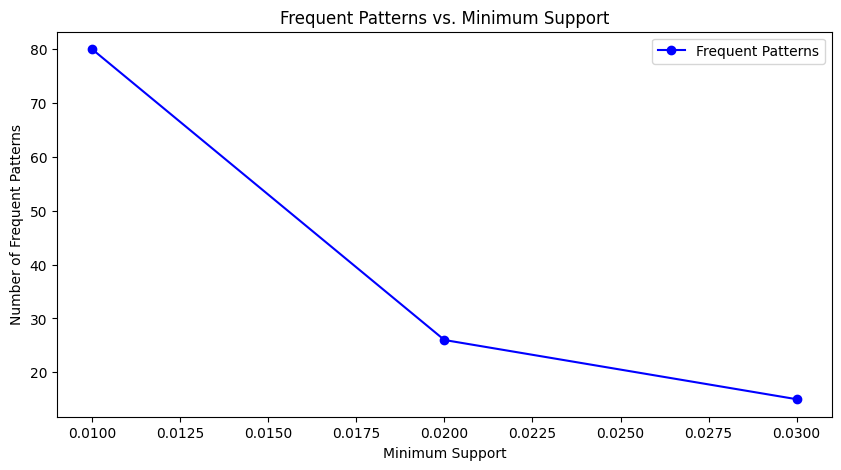

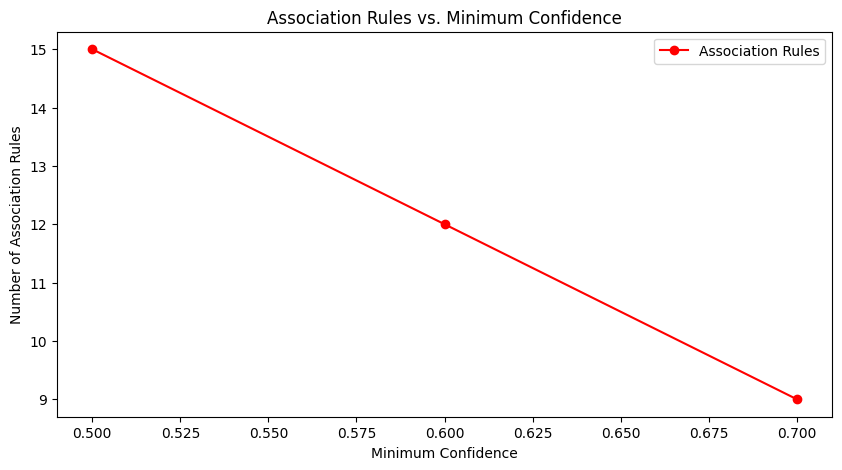

In [3]:
import matplotlib.pyplot as plt

support_counts = [len(frequent_patterns[support]) for support in min_support_values]
plt.figure(figsize=(10, 5))
plt.plot(min_support_values, support_counts, marker='o', color='b', label="Frequent Patterns")
plt.xlabel("Minimum Support")
plt.ylabel("Number of Frequent Patterns")
plt.title("Frequent Patterns vs. Minimum Support")
plt.legend()
plt.show()

conf_rule_counts = [
    len(association_rules_by_confidence[conf]) if conf in association_rules_by_confidence else 0
    for conf in min_confidence_values
]
plt.figure(figsize=(10, 5))
plt.plot(min_confidence_values, conf_rule_counts, marker='o', color='r', label="Association Rules")
plt.xlabel("Minimum Confidence")
plt.ylabel("Number of Association Rules")
plt.title("Association Rules vs. Minimum Confidence")
plt.legend()
plt.show()
